In [16]:
#Loading libraries
from pandas import Series
from pandas import DataFrame

from scipy.stats import boxcox

from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

#Libraries for modelling ARIMA and calculating the ADF Test.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

#Libraries for plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#Setting up my working directory.
import os
os.chdir("C:/Users/user/Desktop/Python")

In [3]:
########## HARNESS TEST ( investigate the data and evaluate candidate models) ##########
# Step 1: Validation Dataset
# The dataset is not updated data to validate the model. In short, we cannot easily collect updated data to validate the model

# Loading the dataset as a Pandas Series and split into two, 
# one for model development (dataset.csv) and the other for validation (validation.csv)

series = Series.from_csv('Prices.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

# dataset.csv are datapoints from 01/12/1997 to 22/12/2017.
# validation.csv are datapoints from 23/12/2017 to 03/01/2018.

Dataset 7327, Validation 12


In [4]:
########## Model Evaluation ##########
# Test Strategy

# Looad the dataset for model development (dataset.csv)
series = Series.from_csv('dataset.csv')

# Preparing the data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# Spliting the dataset into train and test sets directly.
# I converted a the dataset to float32 in case the loaded data still has some String or Integer data types.

In [5]:
# Validation using walk-forward
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

# Print performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=119.368, Expected=121
>Predicted=120.546, Expected=120
>Predicted=120.296, Expected=119
>Predicted=118.771, Expected=119
>Predicted=118.771, Expected=119
>Predicted=118.771, Expected=117
>Predicted=117.076, Expected=118
>Predicted=117.730, Expected=118
>Predicted=117.730, Expected=118
>Predicted=118.472, Expected=120
>Predicted=120.180, Expected=120
>Predicted=120.180, Expected=120
>Predicted=120.180, Expected=121
>Predicted=121.073, Expected=121
>Predicted=121.073, Expected=121
>Predicted=121.332, Expected=120
>Predicted=119.807, Expected=120
>Predicted=119.507, Expected=120
>Predicted=119.507, Expected=120
>Predicted=119.507, Expected=119
>Predicted=118.622, Expected=119
>Predicted=118.622, Expected=118
>Predicted=117.584, Expected=118
>Predicted=117.527, Expected=115
>Predicted=114.647, Expected=115
>Predicted=114.647, Expected=115
>Predicted=114.647, Expected=115
>Predicted=114.550, Expected=113
>Predicted=112.700, Expected=114
>Predicted=113.884, Expected=115
>Predicted

>Predicted=78.994, Expected= 79
>Predicted=79.345, Expected= 80
>Predicted=79.563, Expected= 80
>Predicted=79.563, Expected= 80
>Predicted=79.563, Expected= 78
>Predicted=77.739, Expected= 77
>Predicted=76.684, Expected= 77
>Predicted=76.609, Expected= 77
>Predicted=77.169, Expected= 77
>Predicted=77.454, Expected= 77
>Predicted=77.454, Expected= 77
>Predicted=77.454, Expected= 75
>Predicted=75.132, Expected= 75
>Predicted=75.190, Expected= 76
>Predicted=75.837, Expected= 77
>Predicted=77.488, Expected= 77
>Predicted=77.286, Expected= 77
>Predicted=77.286, Expected= 77
>Predicted=77.286, Expected= 78
>Predicted=78.010, Expected= 77
>Predicted=77.378, Expected= 78
>Predicted=77.698, Expected= 76
>Predicted=75.578, Expected= 76
>Predicted=75.578, Expected= 76
>Predicted=75.578, Expected= 76
>Predicted=75.578, Expected= 76
>Predicted=75.569, Expected= 74
>Predicted=74.105, Expected= 74
>Predicted=74.054, Expected= 74
>Predicted=74.197, Expected= 74
>Predicted=74.021, Expected= 74
>Predict

>Predicted=190.756, Expected=188
>Predicted=188.310, Expected=190
>Predicted=190.051, Expected=188
>Predicted=187.661, Expected=188
>Predicted=187.661, Expected=188
>Predicted=187.661, Expected=190
>Predicted=189.985, Expected=193
>Predicted=192.732, Expected=192
>Predicted=191.998, Expected=194
>Predicted=193.937, Expected=193
>Predicted=193.400, Expected=193
>Predicted=193.400, Expected=193
>Predicted=193.400, Expected=193
>Predicted=192.535, Expected=195
>Predicted=194.586, Expected=195
>Predicted=194.699, Expected=197
>Predicted=196.571, Expected=197
>Predicted=197.380, Expected=197
>Predicted=197.380, Expected=197
>Predicted=197.380, Expected=197
>Predicted=197.380, Expected=198
>Predicted=197.691, Expected=198
>Predicted=197.710, Expected=198
>Predicted=197.569, Expected=199
>Predicted=198.753, Expected=199
>Predicted=198.753, Expected=199
>Predicted=198.753, Expected=199
>Predicted=198.725, Expected=199
>Predicted=199.290, Expected=199
>Predicted=199.121, Expected=199
>Predicted

In [6]:
# Running the test harness prints the prediction and observation for each iteration of the test dataset.
# the persistence model achieved an RMSE of 1.191.
# It means that on average, the model was wrong by about 1% for each prediction made.

In [7]:
########## DATA ANALYSIS ##########
# Calculates and prints summary statistics for the time series.
print(series.describe())

count    7327.000000
mean      119.002067
std        47.819232
min        56.588990
25%        86.168460
50%       101.633530
75%       130.975320
max       268.200000
dtype: float64


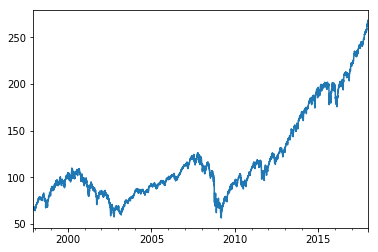

In [8]:
# Line plot
series.plot()
pyplot.show()

In [9]:
# Manually configured ARIMA
# Create a difference function
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return Series(diff)

In [11]:
X = series.values

# Difference data
stationary = difference(X)
stationary.index = series.index[1:]

# Check if stationary. Running the ADF test again.
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Save as stationary.csv
stationary.to_csv('stationary.csv')

ADF Statistic: -28.132667
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [12]:
# P of 0.000 means that the results were highly significant.

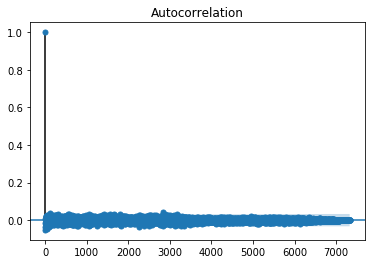

In [13]:
# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.
series = Series.from_csv('stationary.csv')
plot_acf(series)
pyplot.show()

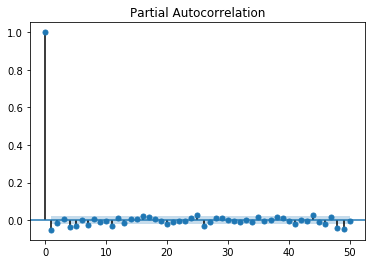

In [14]:
plot_pacf(series, lags=50)
pyplot.show()

In [15]:
# With the data visualization I have, my first conclusion is that the ARIMA model is a white-noise (0,0,0).

In [16]:
# Using GRID search ARIMA Hyperparameters.
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset again incase.
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # Calculate out of sample error
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse
 
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
series = Series.from_csv('dataset.csv')

# Evaluate parameters based on Question no. 2
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=65.962
